In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [28]:
# Read the data from the file train.csv
df = pd.read_csv('train.csv')
data_matrix = np.array(df.values)

# Drop the first column (id)
data_matrix = np.delete(data_matrix, 0, 1)

# Display as a table
df_train = pd.DataFrame(data_matrix)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,4096
0,0.0,0.0,1.272801,0.290501,0.581446,0.0,0.0,0,0.0,0.0,...,1.645888,0.86964,0.302432,0.953719,0.022545,0.498048,0.0,0.034988,0.692382,Orange_Ripe
1,0.0,0.0,1.542096,0.0,0.896557,0.049978,0.0,0,0.117847,0.0,...,1.50422,0.622686,0.588427,0.524415,0.305426,0.386204,0.0,0.0,0.668196,Banana_Ripe
2,0.0,0.0,1.098595,0.571866,0.500355,0.0,0.0,0,0.493137,0.0,...,1.169341,0.913239,0.064404,0.53127,0.0,0.471604,0.0,0.0,0.65825,Mango_Raw
3,0.0,0.101666,1.159194,0.599216,0.893206,0.0,0.200139,0,0.645675,0.0,...,0.560686,1.243676,0.432523,0.701881,0.0,0.589985,0.0,0.0,0.591165,Leeche_Raw
4,0.0,0.0,1.178603,0.362568,0.577602,0.0,0.0,0,0.079862,0.0,...,1.206032,0.736831,0.345906,0.878515,0.119,0.261441,0.0,0.0,0.458905,Mango_Ripe


In [29]:
print(len(np.unique(data_matrix[:, -1])))

20


In [30]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data_matrix[:, :-1], data_matrix[:, -1], test_size=0.2, random_state=42)

In [31]:
# Scale the data
sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

# Covariance matrix of data
cov_mat = np.cov(X_train.T)

print(cov_mat.shape)

# Eigenvalues and eigenvectors of the covariance matrix
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# Sort the eigenvalues in descending order with their corresponding eigenvectors
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)


(4096, 4096)


(0.118753605520084+0j)
(0.3432284129770707+0j)
(0.4852851791770431+0j)
(0.6105147923898855+0j)
(0.7518326960251819+0j)
(0.8398680165513738+0j)
(0.9152167045670595+0j)
(0.9843627901921828+0j)
(0.9999999999999999+0j)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


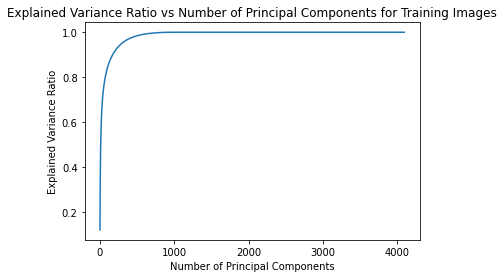

In [32]:
# Check the variance explained by each of the following principal components
# 1 principal component
print(eigen_pairs[0][0] / sum(eigen_vals))

# 5 principal components
print(sum([eigen_pairs[i][0] for i in range(5)]) / sum(eigen_vals))

# 10 principal components
print(sum([eigen_pairs[i][0] for i in range(10)]) / sum(eigen_vals))

# 20 principal components
print(sum([eigen_pairs[i][0] for i in range(20)]) / sum(eigen_vals))

# 50 principal components
print(sum([eigen_pairs[i][0] for i in range(50)]) / sum(eigen_vals))

# 100 principal components
print(sum([eigen_pairs[i][0] for i in range(100)]) / sum(eigen_vals))

# 200 principal components
print(sum([eigen_pairs[i][0] for i in range(200)]) / sum(eigen_vals))

# 500 principal components
print(sum([eigen_pairs[i][0] for i in range(500)]) / sum(eigen_vals))

# 1000 principal components
print(sum([eigen_pairs[i][0] for i in range(1000)]) / sum(eigen_vals))

# Calculate the explained variance ratio
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]

# Plot the explained variance ratio versus the number of principal components
plt.plot(np.cumsum(var_exp))
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs Number of Principal Components for Training Images')
plt.show()


In [33]:
# Apply PCA with 500 principal components
from sklearn.decomposition import PCA

# Create a PCA object
pca = PCA(n_components=600)

# Fit the PCA object to the training data
pca.fit(X_train)

# Transform the training data
X_train = pca.transform(X_train)

# Transform the test data
X_test = pca.transform(X_test)

# Apply LDA
lda = LDA(n_components=19)


lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)

# Evaluate the model
accuracy = lda.score(X_test, y_test)
print(accuracy)

# Apply Random Forest
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = classifier.score(X_test, y_test)

print(accuracy)


0.7909836065573771
0.3360655737704918


In [34]:
# Apply Logistic Regression
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=42, max_iter=1000)

classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = classifier.score(X_test, y_test)

print(accuracy)

0.7704918032786885
